<a href="https://colab.research.google.com/github/Aashik-asn/Web-Development/blob/main/Vader_and_textblob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('vader_lexicon')  # Download the required lexicon
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

from textblob import TextBlob
from tqdm.notebook import tqdm
from sklearn.metrics import accuracy_score

plt.style.use('ggplot')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#df = pd.read_csv('Reviews.csv')
df = pd.read_csv('/content/drive/MyDrive/Proj/Code(Jupyter)/Reviews.csv')
print(df.shape)
df = df.head(10000) #To minimise the values
print(df.shape)
print(df)

(568454, 10)
(10000, 10)
         Id   ProductId          UserId                      ProfileName  \
0         1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1         2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2         3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3         4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4         5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
...     ...         ...             ...                              ...   
9995   9996  B000P41A28  A3A63RACXR1XIL            A. Boodhoo "deaddodo"   
9996   9997  B000P41A28    A5VVRGL8JA7R                             Adam   
9997   9998  B000P41A28  A2TGDTJ8YCU6PD                          geena77   
9998   9999  B000P41A28   AUV4GIZZE693O              Susan Coe "sueysis"   
9999  10000  B000P41A28   A82WIMR4RSVLI                       Emrose mom   

      HelpfulnessNumerator  HelpfulnessDenominator  Score     

In [4]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,10000.00000,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,5000.50000,1.573500,2.014900,4.134500,1.294359e+09
std,2886.89568,5.230634,5.807551,1.327172,4.769699e+07
min,1.00000,0.000000,0.000000,1.000000,9.617184e+08
25%,2500.75000,0.000000,0.000000,4.000000,1.268762e+09
50%,5000.50000,0.000000,1.000000,5.000000,1.307837e+09
75%,7500.25000,2.000000,2.000000,5.000000,1.329955e+09
max,10000.00000,187.000000,216.000000,5.000000,1.351210e+09


In [5]:
print(df.info()) # to check all columns are non-empty

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      10000 non-null  int64 
 1   ProductId               10000 non-null  object
 2   UserId                  10000 non-null  object
 3   ProfileName             10000 non-null  object
 4   HelpfulnessNumerator    10000 non-null  int64 
 5   HelpfulnessDenominator  10000 non-null  int64 
 6   Score                   10000 non-null  int64 
 7   Time                    10000 non-null  int64 
 8   Summary                 10000 non-null  object
 9   Text                    10000 non-null  object
dtypes: int64(5), object(5)
memory usage: 781.4+ KB
None


In [6]:
uniqId = len(df["ProductId"].unique())
print("Total Number of ProductID : " + str (len(df["ProductId"])))
print("Number of Unique ProductID : " + str (uniqId))

Total Number of ProductID : 10000
Number of Unique ProductID : 1422


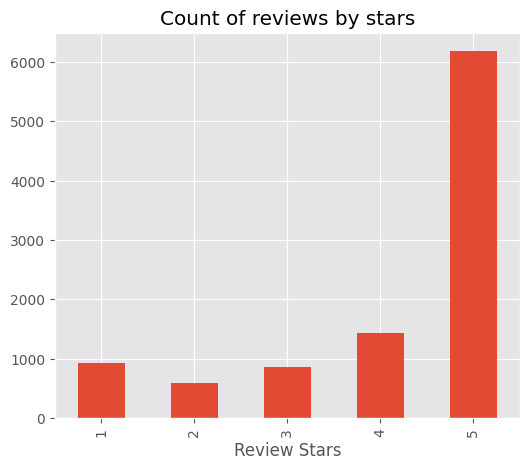

In [7]:
ax=df['Score'].value_counts().sort_index().plot(kind='bar',
                                             title = 'Count of reviews by stars',
                                             figsize = (6, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [8]:
#Creating a dict res1 which consist of sentiment based on the reviewer rating
res={}
for i, row in tqdm(df.iterrows(), total = len(df)):
    score = row['Score']
    myid = row['Id']
    if score>3:
        res[myid] = {'sentiment': "Positive"}
    elif score<3:
        res[myid] = {'sentiment': "Negative"}
    else:
        res[myid] = {'sentiment': "Neutral"}
res

  0%|          | 0/10000 [00:00<?, ?it/s]

{1: {'sentiment': 'Positive'},
 2: {'sentiment': 'Negative'},
 3: {'sentiment': 'Positive'},
 4: {'sentiment': 'Negative'},
 5: {'sentiment': 'Positive'},
 6: {'sentiment': 'Positive'},
 7: {'sentiment': 'Positive'},
 8: {'sentiment': 'Positive'},
 9: {'sentiment': 'Positive'},
 10: {'sentiment': 'Positive'},
 11: {'sentiment': 'Positive'},
 12: {'sentiment': 'Positive'},
 13: {'sentiment': 'Negative'},
 14: {'sentiment': 'Positive'},
 15: {'sentiment': 'Positive'},
 16: {'sentiment': 'Positive'},
 17: {'sentiment': 'Negative'},
 18: {'sentiment': 'Positive'},
 19: {'sentiment': 'Positive'},
 20: {'sentiment': 'Positive'},
 21: {'sentiment': 'Positive'},
 22: {'sentiment': 'Positive'},
 23: {'sentiment': 'Positive'},
 24: {'sentiment': 'Positive'},
 25: {'sentiment': 'Positive'},
 26: {'sentiment': 'Positive'},
 27: {'sentiment': 'Negative'},
 28: {'sentiment': 'Positive'},
 29: {'sentiment': 'Positive'},
 30: {'sentiment': 'Positive'},
 31: {'sentiment': 'Positive'},
 32: {'sentiment'

In [9]:
manual=pd.DataFrame(res).T #dict to dataframe , .T is transpose
manual = manual.reset_index().rename(columns={'index': 'Id'})
print(manual)

         Id sentiment
0         1  Positive
1         2  Negative
2         3  Positive
3         4  Negative
4         5  Positive
...     ...       ...
9995   9996  Negative
9996   9997  Positive
9997   9998  Positive
9998   9999  Positive
9999  10000  Positive

[10000 rows x 2 columns]


In [10]:
df=df.merge(manual)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Negative
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Positive


In [11]:
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [24]:
#!pip uninstall nltk
#!pip install nltk==3.8.1
#downgraded nltk

Found existing installation: nltk 3.9.1
Uninstalling nltk-3.9.1:
  Would remove:
    /usr/local/bin/nltk
    /usr/local/lib/python3.11/dist-packages/nltk-3.9.1.dist-info/*
    /usr/local/lib/python3.11/dist-packages/nltk/*
Proceed (Y/n)? y
  Successfully uninstalled nltk-3.9.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 20.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
textblob 0.19.0 requires nltk>=3.9, but you have nltk 3.8.1 which is incompatible.


In [12]:
import nltk
nltk.download('punkt')#for wordtokenizer
print(nltk.data.path)

['/root/nltk_data', '/usr/nltk_data', '/usr/share/nltk_data', '/usr/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
tokens = nltk.word_tokenize(example, language='english', preserve_line=True)#splitting sentence into words
print(tokens)

['This', 'oatmeal', 'is', 'not', 'good.', 'Its', 'mushy', ',', 'soft', ',', 'I', 'do', "n't", 'like', 'it.', 'Quaker', 'Oats', 'is', 'the', 'way', 'to', 'go', '.']


In [14]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [15]:
tagged=nltk.pos_tag(tokens) #part of speech tag
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good.', 'VB'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ'),
 (',', ',')]

In [ ]:
#nltk.download('words')
#nltk.download('stopwords')
#nltk.download('maxent_ne_chunker')
#not necessary but if required

In [16]:
entities = nltk.chunk.ne_chunk(tagged) #To get below format for furthur work on
print(entities)

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good./VB
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it./JJ
  (PERSON Quaker/NNP Oats/NNP)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


In [18]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer # To use Vader Model
from tqdm.notebook import tqdm #Progress bar
sia = SentimentIntensityAnalyzer()

In [19]:
print(sia.polarity_scores('I am so happy'))#Sentiment score
print(sia.polarity_scores('I am so happy!!!')) #intensity on '!'
print(sia.polarity_scores(':)'))

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}
{'neg': 0.0, 'neu': 0.291, 'pos': 0.709, 'compound': 0.7067}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4588}


In [20]:
print(sia.polarity_scores('I am so sad'))
print(sia.polarity_scores('I am so sad!!!'))
print(sia.polarity_scores(':('))

{'neg': 0.629, 'neu': 0.371, 'pos': 0.0, 'compound': -0.5256}
{'neg': 0.681, 'neu': 0.319, 'pos': 0.0, 'compound': -0.645}
{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4404}


In [21]:
print(example)
print(sia.polarity_scores(example))

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.
{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}


In [22]:
vad_res={}
#for i,row in (df.iterrows()): #we can also use this
#tqdm is used to display that progress(total gives the denom '500')
for i, row in tqdm(df.iterrows(),total = len(df)):
    text = row['Text']
    myid = row['Id']
    vad_res[myid] = sia.polarity_scores(text)
vad_res

  0%|          | 0/10000 [00:00<?, ?it/s]

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [23]:
vaders = pd.DataFrame(vad_res).T #.T interchange the rows and columns
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
#Here index has renamed as Id, since we need a same column while merging
vaders = vaders.merge(df) #merging df dataset in vaders
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Positive
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Negative
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Positive


In [24]:
df = df.merge(vaders)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment,neg,neu,pos,compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive,0.000,0.695,0.305,0.9441
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative,0.138,0.862,0.000,-0.5664
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Positive,0.091,0.754,0.155,0.8265
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Negative,0.000,1.000,0.000,0.0000
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Positive,0.000,0.552,0.448,0.9468


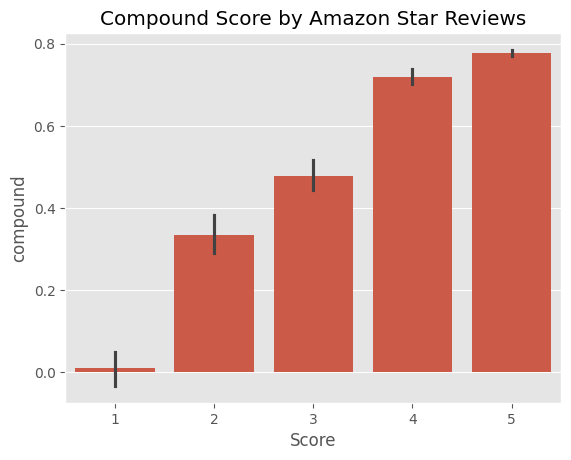

In [25]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
#Compound score is the avg polarity score
ax.set_title('Compound Score by Amazon Star Reviews')
plt.show()

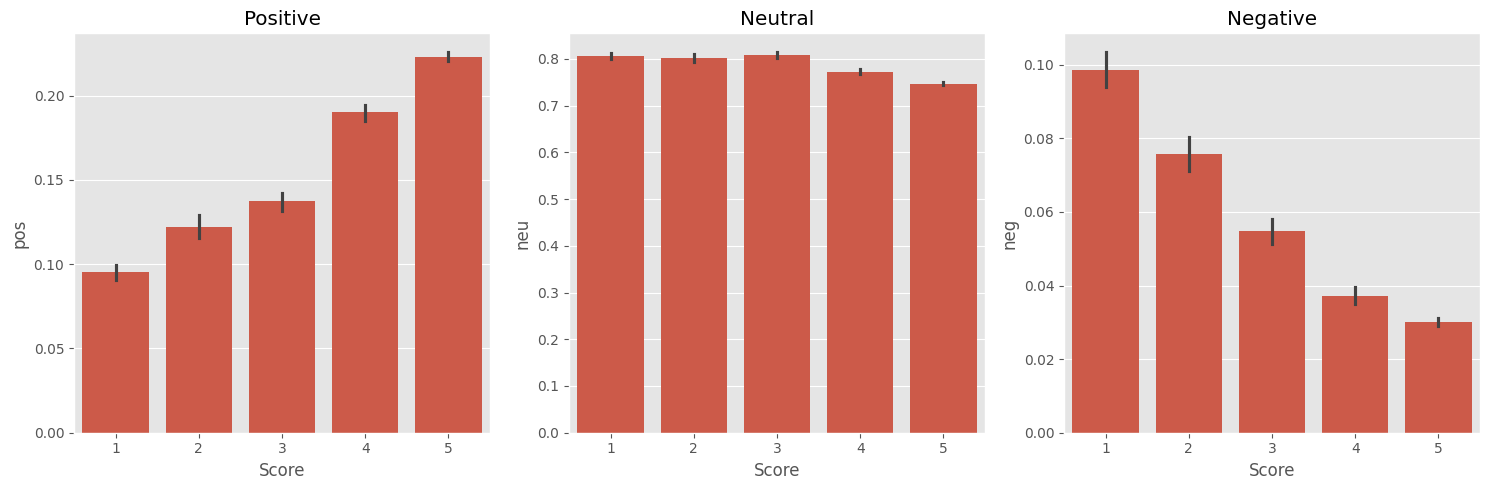

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))
sns.barplot(data=vaders, x='Score', y='pos', ax = axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax = axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax = axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout() #To avoid Overlap
plt.show()

In [27]:
#Creating a dict res1 which consist of sentiment based on the vader polarity score
res1={}
for i, row in tqdm(df.iterrows(), total = len(df)):
    score = row['compound']
    myid = row['Id']
    if score>=0.05:
        res1[myid] = {'vader_sentiment': "Positive"}
    elif score<=-0.05:
        res1[myid] = {'vader_sentiment': "Negative"}
    else:
        res1[myid] = {'vader_sentiment': "Neutral"}
res1

  0%|          | 0/10000 [00:00<?, ?it/s]

{1: {'vader_sentiment': 'Positive'},
 2: {'vader_sentiment': 'Negative'},
 3: {'vader_sentiment': 'Positive'},
 4: {'vader_sentiment': 'Neutral'},
 5: {'vader_sentiment': 'Positive'},
 6: {'vader_sentiment': 'Positive'},
 7: {'vader_sentiment': 'Positive'},
 8: {'vader_sentiment': 'Positive'},
 9: {'vader_sentiment': 'Positive'},
 10: {'vader_sentiment': 'Positive'},
 11: {'vader_sentiment': 'Positive'},
 12: {'vader_sentiment': 'Negative'},
 13: {'vader_sentiment': 'Positive'},
 14: {'vader_sentiment': 'Positive'},
 15: {'vader_sentiment': 'Positive'},
 16: {'vader_sentiment': 'Positive'},
 17: {'vader_sentiment': 'Positive'},
 18: {'vader_sentiment': 'Positive'},
 19: {'vader_sentiment': 'Positive'},
 20: {'vader_sentiment': 'Positive'},
 21: {'vader_sentiment': 'Positive'},
 22: {'vader_sentiment': 'Positive'},
 23: {'vader_sentiment': 'Positive'},
 24: {'vader_sentiment': 'Positive'},
 25: {'vader_sentiment': 'Positive'},
 26: {'vader_sentiment': 'Neutral'},
 27: {'vader_sentiment'

In [28]:
vaderauto = pd.DataFrame(res1).T #dict to dataframe
vaderauto = vaderauto.reset_index().rename(columns={'index': 'Id'})
df = df.merge(vaderauto, how='left')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment,neg,neu,pos,compound,vader_sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive,0.000,0.695,0.305,0.9441,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative,0.138,0.862,0.000,-0.5664,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Positive,0.091,0.754,0.155,0.8265,Positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Negative,0.000,1.000,0.000,0.0000,Neutral
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Positive,0.000,0.552,0.448,0.9468,Positive


In [29]:
from textblob import TextBlob

In [30]:
print(TextBlob('I am so happy').sentiment)#Sentiment score
print(TextBlob('I am so happy!!!').sentiment) #intensity on '!'
print(TextBlob(':)').sentiment)

Sentiment(polarity=0.8, subjectivity=1.0)
Sentiment(polarity=1.0, subjectivity=1.0)
Sentiment(polarity=0.5, subjectivity=1.0)


In [31]:
print(TextBlob('I am so sad').sentiment)
print(TextBlob('I am so sad!!!').sentiment)
print(TextBlob(':(').sentiment)

Sentiment(polarity=-0.5, subjectivity=1.0)
Sentiment(polarity=-0.9765625, subjectivity=1.0)
Sentiment(polarity=-0.75, subjectivity=1.0)


In [32]:
print(example)
print(TextBlob(example).sentiment)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.
Sentiment(polarity=-0.12499999999999999, subjectivity=0.47500000000000003)


In [33]:
tb_res={}
#for i,row in (df.iterrows()): #we can also use this
#tqdm is used to display that progress(total gives the denom '500')
for i, row in tqdm(df.iterrows(),total = len(df)):
    text = row['Text']
    myid = row['Id']
    temp={}
    temp['polarity']=((TextBlob(text)).sentiment)[0]
    tb_res[myid] = temp
tb_res

  0%|          | 0/10000 [00:00<?, ?it/s]

{1: {'polarity': 0.45},
 2: {'polarity': -0.033333333333333326},
 3: {'polarity': 0.1335714285714286},
 4: {'polarity': 0.16666666666666666},
 5: {'polarity': 0.48333333333333334},
 6: {'polarity': 0.25740740740740736},
 7: {'polarity': 0.25083333333333335},
 8: {'polarity': 0.48600000000000004},
 9: {'polarity': 0.42857142857142855},
 10: {'polarity': 0.44999999999999996},
 11: {'polarity': 0.20859375},
 12: {'polarity': 0.012500000000000002},
 13: {'polarity': 0.12992424242424241},
 14: {'polarity': 0.64},
 15: {'polarity': -0.5},
 16: {'polarity': 0.225},
 17: {'polarity': 0.50625},
 18: {'polarity': 0.4125},
 19: {'polarity': 0.1284722222222222},
 20: {'polarity': 0.24},
 21: {'polarity': 0.4},
 22: {'polarity': 0.11666666666666665},
 23: {'polarity': 0.125},
 24: {'polarity': 0.25},
 25: {'polarity': 0.3214285714285714},
 26: {'polarity': 0.0},
 27: {'polarity': 0.0},
 28: {'polarity': 0.14583333333333331},
 29: {'polarity': 0.38636363636363635},
 30: {'polarity': 0.20859375},
 31

In [34]:
textblobs = pd.DataFrame(tb_res).T
textblobs = textblobs.reset_index().rename(columns={'index': 'Id'})
textblobs = textblobs.merge(df, how='left')
textblobs.head()

,Id,polarity,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment,neg,neu,pos,compound,vader_sentiment
0,1,0.450000,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive,0.000,0.695,0.305,0.9441,Positive
1,2,-0.033333,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative,0.138,0.862,0.000,-0.5664,Negative
2,3,0.133571,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Positive,0.091,0.754,0.155,0.8265,Positive
3,4,0.166667,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Negative,0.000,1.000,0.000,0.0000,Neutral
4,5,0.483333,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Positive,0.000,0.552,0.448,0.9468,Positive


In [35]:
df = df.merge(textblobs, how='left')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment,neg,neu,pos,compound,vader_sentiment,polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive,0.000,0.695,0.305,0.9441,Positive,0.450000
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative,0.138,0.862,0.000,-0.5664,Negative,-0.033333
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Positive,0.091,0.754,0.155,0.8265,Positive,0.133571
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Negative,0.000,1.000,0.000,0.0000,Neutral,0.166667
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Positive,0.000,0.552,0.448,0.9468,Positive,0.483333


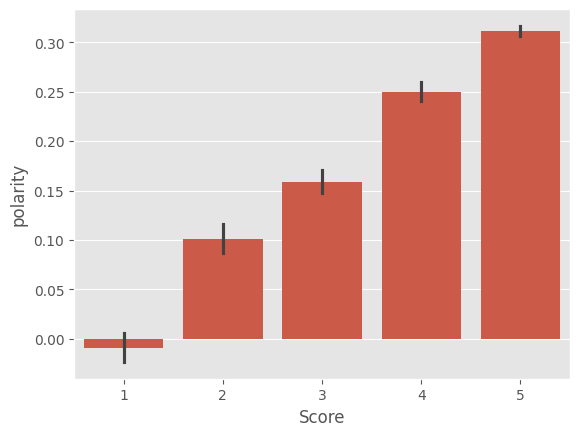

In [36]:
ax1 = sns.barplot(data=textblobs, x='Score', y='polarity')
ax.set_title('Polarity Score by Amazon Star Reviews')
plt.show()

In [37]:
#Creating a dict res1 which consist of sentiment based on the textblob polarity score
res2={}
for i, row in tqdm(df.iterrows(), total = len(df)):
    score = row['polarity']
    myid = row['Id']
    if score>=0.05:
        res2[myid] = {'textblob_sentiment': "Positive"}
    elif score<=-0.05:
        res2[myid] = {'textblob_sentiment': "Negative"}
    else:
        res2[myid] = {'textblob_sentiment': "Neutral"}
res2

  0%|          | 0/10000 [00:00<?, ?it/s]

{1: {'textblob_sentiment': 'Positive'},
 2: {'textblob_sentiment': 'Neutral'},
 3: {'textblob_sentiment': 'Positive'},
 4: {'textblob_sentiment': 'Positive'},
 5: {'textblob_sentiment': 'Positive'},
 6: {'textblob_sentiment': 'Positive'},
 7: {'textblob_sentiment': 'Positive'},
 8: {'textblob_sentiment': 'Positive'},
 9: {'textblob_sentiment': 'Positive'},
 10: {'textblob_sentiment': 'Positive'},
 11: {'textblob_sentiment': 'Positive'},
 12: {'textblob_sentiment': 'Neutral'},
 13: {'textblob_sentiment': 'Positive'},
 14: {'textblob_sentiment': 'Positive'},
 15: {'textblob_sentiment': 'Negative'},
 16: {'textblob_sentiment': 'Positive'},
 17: {'textblob_sentiment': 'Positive'},
 18: {'textblob_sentiment': 'Positive'},
 19: {'textblob_sentiment': 'Positive'},
 20: {'textblob_sentiment': 'Positive'},
 21: {'textblob_sentiment': 'Positive'},
 22: {'textblob_sentiment': 'Positive'},
 23: {'textblob_sentiment': 'Positive'},
 24: {'textblob_sentiment': 'Positive'},
 25: {'textblob_sentiment':

In [38]:
tbauto = pd.DataFrame(res2).T #dict to dataframe
tbauto = tbauto.reset_index().rename(columns={'index': 'Id'})
df = df.merge(tbauto, how='left')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment,neg,neu,pos,compound,vader_sentiment,polarity,textblob_sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive,0.000,0.695,0.305,0.9441,Positive,0.450000,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative,0.138,0.862,0.000,-0.5664,Negative,-0.033333,Neutral
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Positive,0.091,0.754,0.155,0.8265,Positive,0.133571,Positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Negative,0.000,1.000,0.000,0.0000,Neutral,0.166667,Positive
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Positive,0.000,0.552,0.448,0.9468,Positive,0.483333,Positive


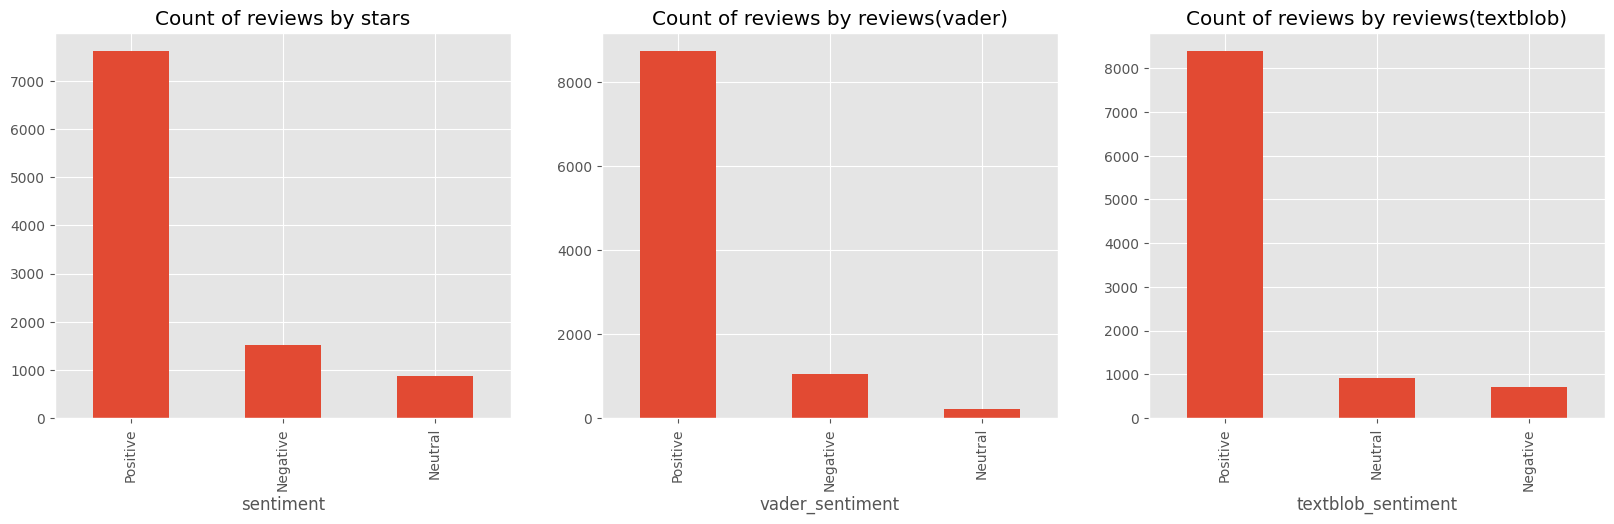

In [39]:
plt.subplot(1,3,1)
df['sentiment'].value_counts().plot(kind='bar',
                                    title = 'Count of reviews by stars',
                                    figsize = (20, 5))
plt.subplot(1,3,2)
df['vader_sentiment'].value_counts().plot(kind='bar',
                                    title = 'Count of reviews by reviews(vader)',
                                    figsize = (20, 5))
plt.subplot(1,3,3)
df['textblob_sentiment'].value_counts().plot(kind='bar',
                                    title = 'Count of reviews by reviews(textblob)',
                                    figsize = (20, 5))
plt.show()

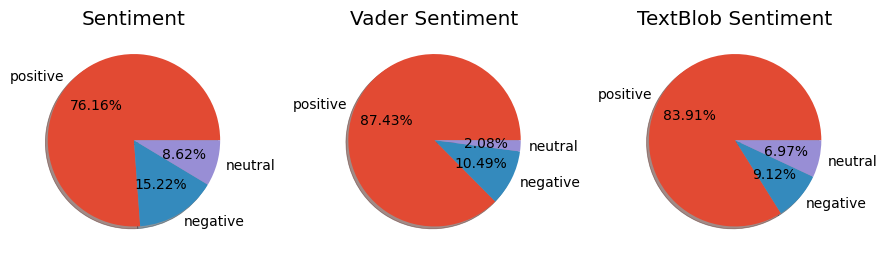

In [40]:
mylabels = ["positive","negative","neutral"]
plt.subplots(1,3,figsize=(9,9))
plt.subplot(1,3,1)
x=df['sentiment'].value_counts()/df.shape[0]
plt.pie(x, shadow = True, autopct="%0.2f%%",labels=mylabels)
plt.title('Sentiment')

plt.subplot(1,3,2)
y=df['vader_sentiment'].value_counts()/df.shape[0]
plt.pie(y, shadow = True, autopct="%0.2f%%",labels=mylabels)
plt.title('Vader Sentiment')

plt.subplot(1,3,3)
z=df['textblob_sentiment'].value_counts()/df.shape[0]
plt.pie(z, shadow = True, autopct="%0.2f%%",labels=mylabels)
plt.title('TextBlob Sentiment')

plt.tight_layout()
plt.show()

In [41]:
from sklearn.metrics import accuracy_score

score=accuracy_score(df['sentiment'],df['textblob_sentiment'])
print("The accuracy of the user rating and user reviewtext(Textblob) are {score}% ".format(score=score*100))

score=accuracy_score(df['sentiment'],df['vader_sentiment'])
print("The accuracy of the user rating and user reviewtext(Vader) are {score}% ".format(score=score*100))

score=round(accuracy_score(df['textblob_sentiment'],df['vader_sentiment']),2)
print("The accuracy of the user reviewtext(textblob) and user reviewtext(Vader) are {score}% ".format(score=score*100))

The accuracy of the user rating and user reviewtext(Textblob) are 75.49% 
The accuracy of the user rating and user reviewtext(Vader) are 78.84% 
The accuracy of the user reviewtext(textblob) and user reviewtext(Vader) are 84.0% 
